# 1. Perkenalan 
- Nama  : Andreean Dharma Arisandi
- Batch : 10

# 2. Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
from feature_engine.outliers import OutlierTrimmer, Winsorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# 3. Data Loading

In [2]:
data = pd.read_csv('bank-additional-full.csv', sep=';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Dari Info dibawah bisa dilihat dataset memiliki 41188 baris dan 21 kolom

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Dari Describe di bawah bisa dilihat Mean, Median, Q1 dan Q3 dan di dapatkan nilai missing value uniqe yaitu 999

In [4]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Previous adalah jumlah kontak yang dilakukan sebelum kampanye ini dan untuk klien ini dari 0 sampe 8 

In [5]:
data['previous'].value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

Target disini Imbalance

In [6]:
data['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [7]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [8]:
num_column = list(data.select_dtypes("number").columns)
data[num_column].describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [9]:
cat_column = list(data.select_dtypes(object).drop(columns = ["y"]).columns)
data[cat_column].describe().T

,count,unique,top,freq
job,41188,12,admin.,10422
marital,41188,4,married,24928
education,41188,8,university.degree,12168
default,41188,3,no,32588
housing,41188,3,yes,21576
loan,41188,3,no,33950
contact,41188,2,cellular,26144
month,41188,10,may,13769
day_of_week,41188,5,thu,8623
poutcome,41188,3,nonexistent,35563


# 4. Exploratory Data Analysis (EDA)

Histogram Plot semua data numerik

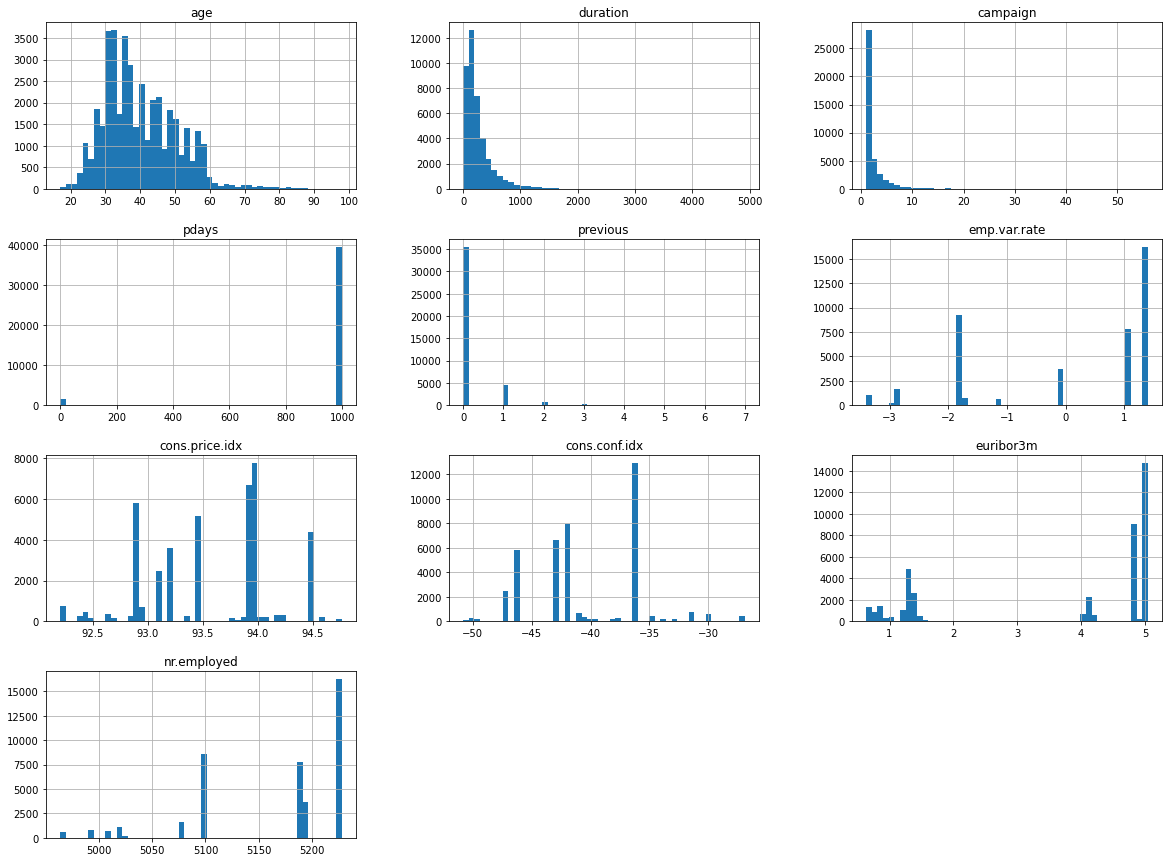

In [10]:
data.hist(bins=50, figsize=(20,15))

plt.show()

Kolom Kategorikal

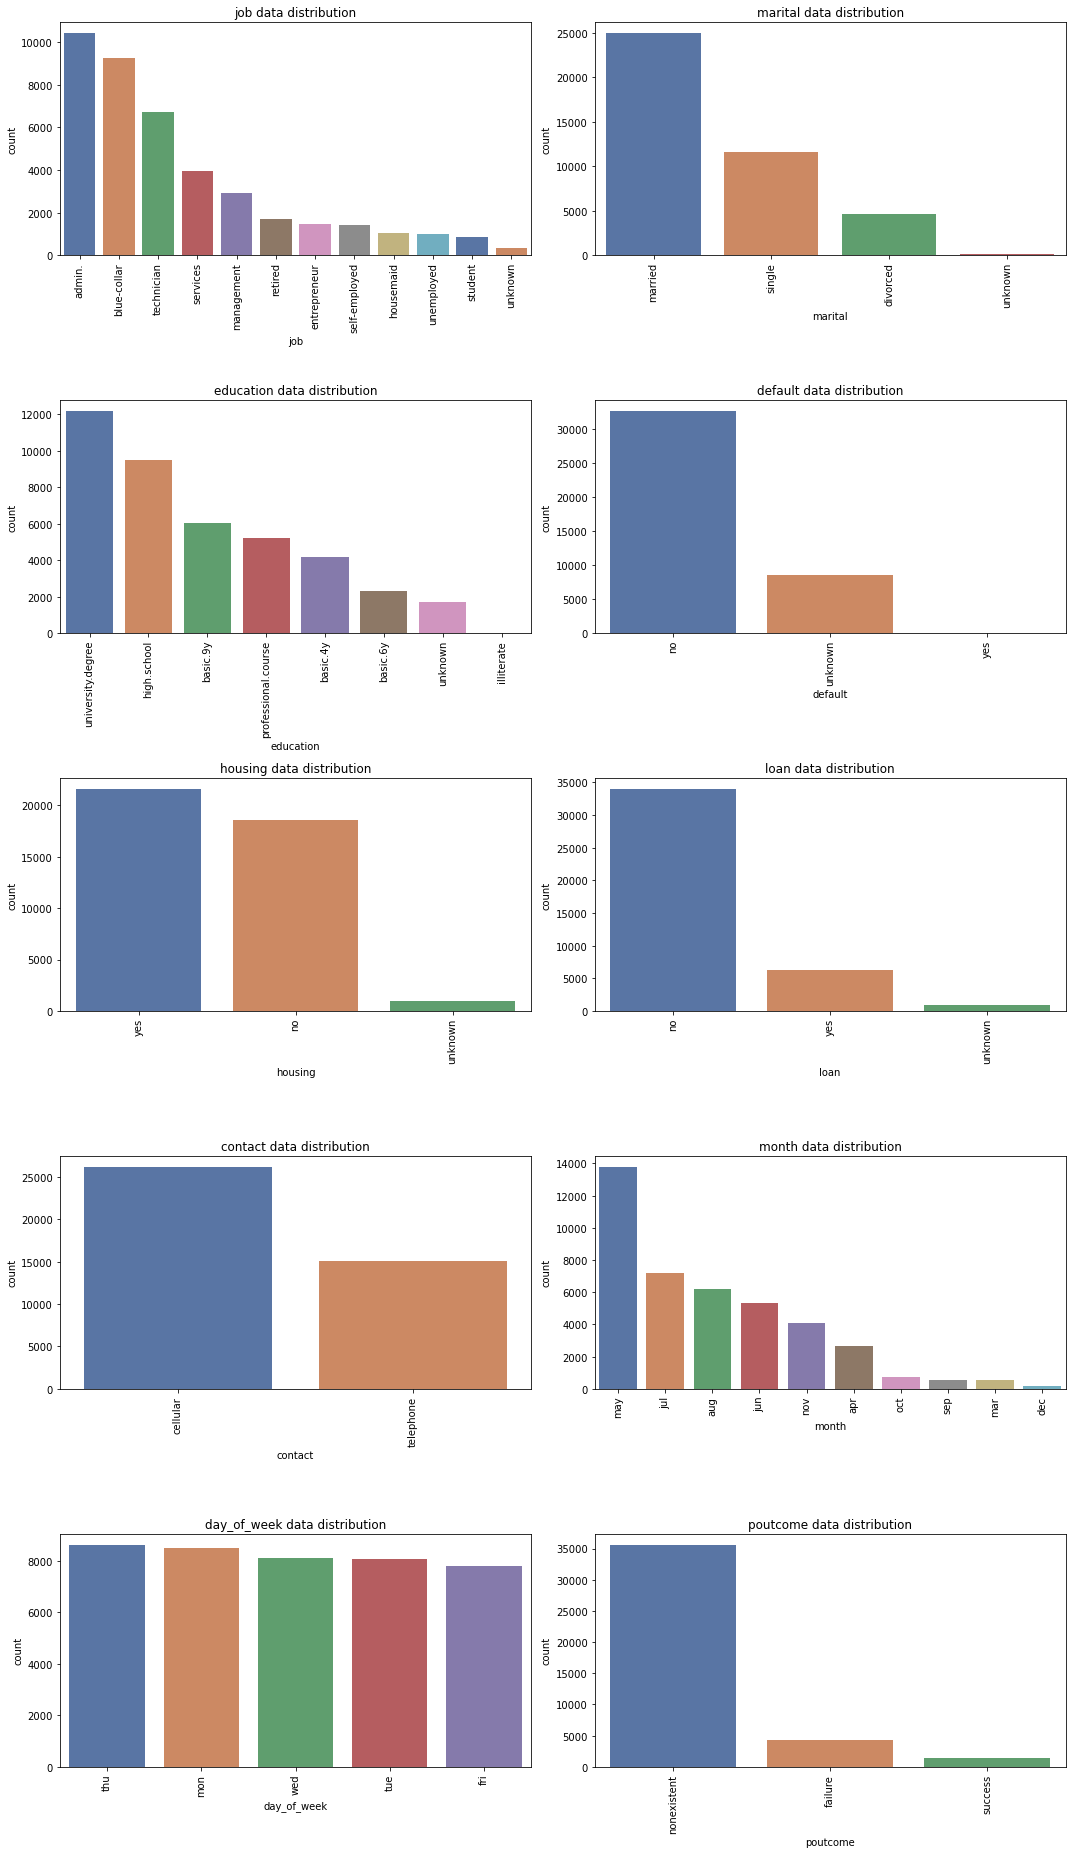

In [11]:
plt.figure(figsize = (15, 30))
for i in range(len(cat_column)):
    plt.subplot(len(cat_column)//2+1, 2, i + 1)
    sns.countplot(
        x = data[cat_column[i]],
        order = data[cat_column[i]].value_counts().sort_values(ascending = False).index,
        palette = "deep"
    )
    plt.title(str(cat_column[i]) + " data distribution", fontweight = 20)
    plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

Berdasarkan kampanye sebelumnya lebih banyak di dapatkan kegagalan di bandingkan berhasil

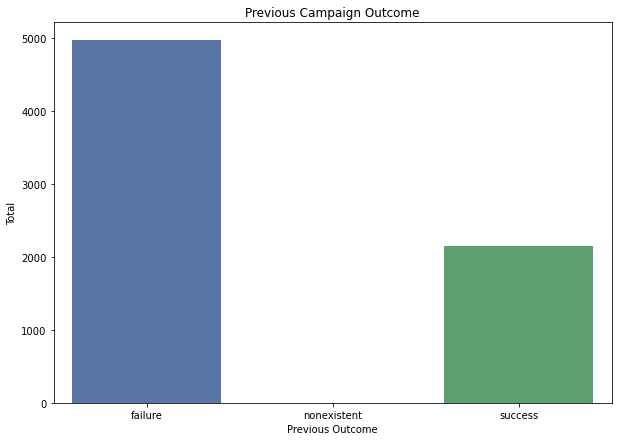

In [12]:
plt.figure(figsize = (10,7))

sns.barplot(
    x='poutcome', 
    y='previous', 
    data=data.groupby(data['poutcome']).sum().previous.reset_index(), 
    palette='deep')

plt.ylabel("Total")
plt.xlabel("Previous Outcome")
plt.title('Previous Campaign Outcome')

plt.show()

Lebih banyak yang no deposito berjangka sejumlah 36548 dibandingkan dengan yes cuma 4640, bisa di katakan data imbalance

In [13]:
data['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

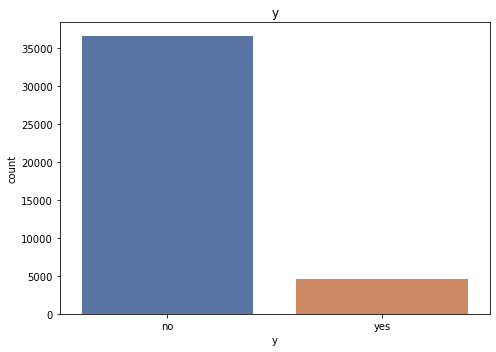

In [14]:
plt.figure(figsize = (7, 5))
sns.countplot(
    x = data["y"],
    order = data["y"].value_counts().sort_values(ascending = False).index,
    palette = "deep"
)
plt.title("y", fontweight = 20)

plt.tight_layout()
plt.show()

Dalam kampanye ini, kami menghubungi klien kami sebagian besar melalui seluler.

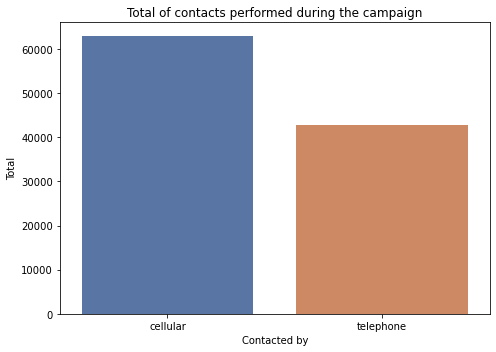

In [15]:
plt.figure(figsize = (7,5))

sns.barplot(x='contact',
            y='campaign',
            data=data.groupby(data['contact']).sum().campaign.reset_index(),
            palette='deep')

plt.ylabel("Total")
plt.xlabel("Contacted by")
plt.title('Total of contacts performed during the campaign')

plt.tight_layout()
plt.show()

In [16]:
yes_edu = data[data['y']=='yes']['education'].value_counts()
yes_edu

university.degree      1670
high.school            1031
professional.course     595
basic.9y                473
basic.4y                428
unknown                 251
basic.6y                188
illiterate                4
Name: education, dtype: int64

Client dengan lulusan universitas memiliki deposito yang berjangka terbanyak disusul dengan High School

<AxesSubplot:xlabel='education'>

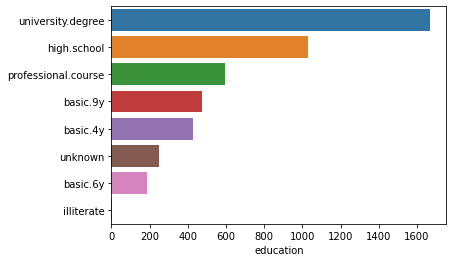

In [17]:
sns.barplot(x=yes_edu, y=yes_edu.index,orient='h')

In [18]:
no_edu = data[data['y']=='no']['education'].value_counts()
no_edu

university.degree      10498
high.school             8484
basic.9y                5572
professional.course     4648
basic.4y                3748
basic.6y                2104
unknown                 1480
illiterate                14
Name: education, dtype: int64

Untuk lulusan Universitas juga terbanyak yang tidak memiliki deposito 

<AxesSubplot:xlabel='education'>

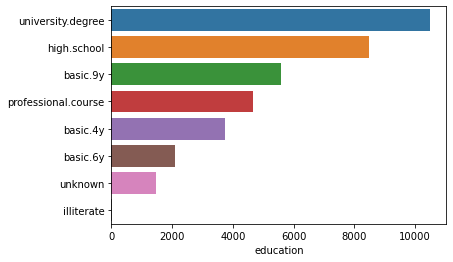

In [19]:
sns.barplot(x=no_edu, y=no_edu.index,orient='h')

In [20]:
data['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [21]:
job_edu = data[data['y']=='yes']['job'].value_counts()
job_edu

admin.           1352
technician        730
blue-collar       638
retired           434
management        328
services          323
student           275
self-employed     149
unemployed        144
entrepreneur      124
housemaid         106
unknown            37
Name: job, dtype: int64

In [22]:
job_edu = data[data['default']=='no']['job'].value_counts()
job_edu

admin.           9129
blue-collar      6088
technician       5765
services         3053
management       2466
retired          1327
entrepreneur     1155
self-employed    1139
unemployed        776
student           771
housemaid         741
unknown           178
Name: job, dtype: int64

<AxesSubplot:xlabel='job'>

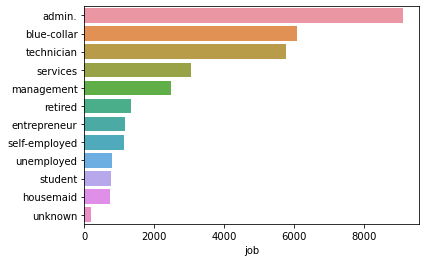

In [23]:
sns.barplot(x=job_edu, y=job_edu.index)

Pekerjaan admin paling banyak memiliki deposito

In [24]:
data['age'].value_counts()

31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
91       2
98       2
87       1
94       1
95       1
Name: age, Length: 78, dtype: int64

In [25]:
data['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [26]:
yes_marital = data[data['y']=='yes']['marital'].value_counts()
yes_marital

married     2532
single      1620
divorced     476
unknown       12
Name: marital, dtype: int64

Status Pernikahan yang memiliki deposito

<AxesSubplot:xlabel='marital'>

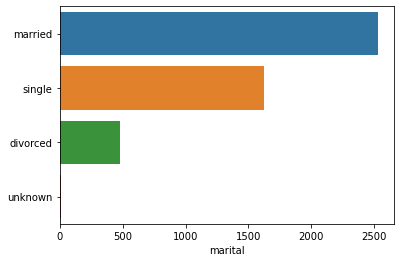

In [27]:
sns.barplot(x=yes_marital, y=yes_marital.index,orient='h')

Rata rata klien adalah statusnya sudah menikah dengan nilai 60%

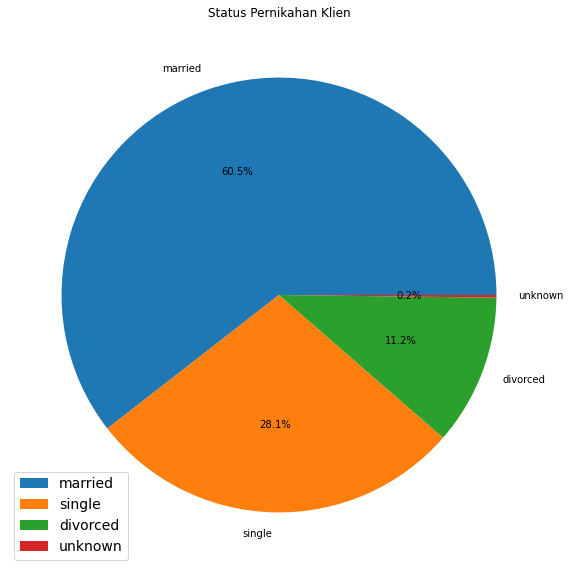

In [28]:
plt.figure(figsize = (10,10))
plt.pie(
    data['marital'].value_counts(),
    labels=data['marital'].value_counts().index,
    autopct='%1.1f%%'
)
plt.title("Status Pernikahan Klien")
plt.legend(loc=3,prop={'size': 14})
plt.show()

Bisa dilihat yang mempunyai kredit bawaan cuma 3 client

In [29]:
data['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

Dan client yang mempunyai kredit bawaan malah tidak ada yang memiliki deposito berjangka, yang tidak memiliki bawaan kredit ada 4197 yang memiliki deposito berjangka

In [30]:
defa = data[data['y']=='yes']['default'].value_counts()
defa

no         4197
unknown     443
Name: default, dtype: int64

Data klien yang memiliki cicilan rumah

In [31]:
data['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [32]:
house_yes = data[data['y']=='yes']['housing'].value_counts()
house_yes

yes        2507
no         2026
unknown     107
Name: housing, dtype: int64

In [33]:
house_no = data[data['y']=='no']['housing'].value_counts()
house_no

yes        19069
no         16596
unknown      883
Name: housing, dtype: int64

client yang memiliki cicilan rumah lebih banyak tidak memiliki deposito berjangka, mungkin dikarenakan harus membayar cicilan rumah jadi sulit mempertimbangkan untuk memiliki deposito berjangka

In [34]:
month_yes = data[data['y']=='yes']['month'].value_counts()
month_yes

may    886
aug    655
jul    649
jun    559
apr    539
nov    416
oct    315
mar    276
sep    256
dec     89
Name: month, dtype: int64

Pada bulan may paling banyak yang menerima deposito berjangka sebangyak 886 dibanding bulan - bulan lainya

In [35]:
data['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [36]:
day_yes = data[data['y']=='yes']['day_of_week'].value_counts()
day_yes

thu    1045
tue     953
wed     949
mon     847
fri     846
Name: day_of_week, dtype: int64

In [37]:
day_s = data[data['poutcome']=='success']['day_of_week'].value_counts()
day_s

thu    314
tue    291
mon    277
wed    270
fri    221
Name: day_of_week, dtype: int64

Pada hari kamis client lebih banyak menerima deposito berjangka

# 5. Data Preprocessing

In [38]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Dikarenakan 999 adalah unique missing value disini saya merubahnya menjadi NaN

In [39]:
data.replace({'pdays':{999 :np.NaN}}, inplace=True)

In [40]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,1515.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,6.014521,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,3.824906,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,3.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,6.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,7.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,27.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [41]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [42]:
data.isnull().sum()

age                   0
job                   0
marital               0
education             0
default               0
housing               0
loan                  0
contact               0
month                 0
day_of_week           0
duration              0
campaign              0
pdays             39673
previous              0
poutcome              0
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed           0
y                     0
dtype: int64

Merubah no dan yes pada target agar bisa dilakukan pengecekan pearson korelasi dengan kolom numerik lainya

In [43]:
data['y'] = data['y'].map({'no':0, 'yes':1})

In [44]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           1515 non-null   float64
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Ambil sampe data inferenced dari dataset

In [46]:
data_inf = data.sample(10, random_state=9)
data_inf

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
35679,25,student,single,high.school,no,yes,no,cellular,may,mon,...,3,NaN,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1,0
37270,36,management,married,university.degree,no,no,no,cellular,aug,mon,...,2,NaN,0,nonexistent,-2.9,92.201,-31.4,0.884,5076.2,0
27805,88,retired,divorced,basic.4y,no,yes,yes,cellular,mar,wed,...,5,NaN,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,1
18170,38,blue-collar,married,unknown,no,yes,yes,cellular,jul,wed,...,2,NaN,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,0
29420,35,technician,married,university.degree,no,no,no,cellular,apr,mon,...,1,NaN,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
12514,35,self-employed,married,high.school,no,no,no,cellular,jul,mon,...,3,NaN,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,0
33228,38,student,divorced,unknown,no,no,no,cellular,may,tue,...,3,NaN,0,nonexistent,-1.8,92.893,-46.2,1.291,5099.1,0
5842,33,services,single,high.school,no,no,no,telephone,may,mon,...,5,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
968,38,unemployed,divorced,professional.course,no,no,no,telephone,may,wed,...,3,NaN,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,0
25177,51,admin.,married,basic.9y,no,no,yes,cellular,nov,tue,...,5,NaN,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,0


Drop  data inferenced dari dataset

In [47]:
data_train = data.drop(data_inf.index)
data_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,NaN,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,NaN,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,NaN,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,NaN,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


Reset index dataset dan data inferenced

In [48]:
data_train.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,25,student,single,high.school,no,yes,no,cellular,may,mon,...,3,NaN,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1,0
1,36,management,married,university.degree,no,no,no,cellular,aug,mon,...,2,NaN,0,nonexistent,-2.9,92.201,-31.4,0.884,5076.2,0
2,88,retired,divorced,basic.4y,no,yes,yes,cellular,mar,wed,...,5,NaN,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,1
3,38,blue-collar,married,unknown,no,yes,yes,cellular,jul,wed,...,2,NaN,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,0
4,35,technician,married,university.degree,no,no,no,cellular,apr,mon,...,1,NaN,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
5,35,self-employed,married,high.school,no,no,no,cellular,jul,mon,...,3,NaN,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,0
6,38,student,divorced,unknown,no,no,no,cellular,may,tue,...,3,NaN,0,nonexistent,-1.8,92.893,-46.2,1.291,5099.1,0
7,33,services,single,high.school,no,no,no,telephone,may,mon,...,5,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
8,38,unemployed,divorced,professional.course,no,no,no,telephone,may,wed,...,3,NaN,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,0
9,51,admin.,married,basic.9y,no,no,yes,cellular,nov,tue,...,5,NaN,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,0


Dataset sekarang berjumlah 41178 dari awalnya 41188 setelah di ambil 10 sample data inferenced

In [49]:
data_train.shape

(41178, 21)

## Split Dataset antara X dan y

In [50]:
X = data_train.drop('y', axis=1) 
y= data_train['y']
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41173,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,NaN,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41174,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,NaN,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41175,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,NaN,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41176,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,NaN,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6


In [51]:
y

0        0
1        0
2        0
3        0
4        0
        ..
41173    1
41174    0
41175    0
41176    1
41177    0
Name: y, Length: 41178, dtype: int64

Split data train set dan tes set

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

print('X_Train Size :', X_train.shape)
print('X_Test Size :', X_test.shape)
print('y_Train Size :', y_train.shape)
print('y_Test Size :', y_test.shape)

X_Train Size : (32942, 20)
X_Test Size : (8236, 20)
y_Train Size : (32942,)
y_Test Size : (8236,)


## Handling Outlier

Membuat fungsi visualisasi distribusi data, boxplot dan cek skew data

In [53]:
def diagnostic_plots(X_train, column):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(X_train[column],bins=30, palette='deep')
    plt.title(f'Distribution of {column}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(X_train[column])
    plt.title(f'Boxplot of {column}')

    skewness = X_train[column].skew(axis = 0, skipna = True)
    print (f'Skewness of {column} =', skewness)

In [54]:
num_columns = X_train.select_dtypes (include=np.number).columns.tolist()

Visualisasi Histogram, Boxplot dan pengecekan nilai skew

Skewness of age = 0.7884533285534918
Skewness of duration = 3.2060863395398305
Skewness of campaign = 4.7817230300018565
Skewness of pdays = 1.5329352722698248
Skewness of previous = 3.8052045589740695
Skewness of emp.var.rate = -0.7319182175812129
Skewness of cons.price.idx = -0.23386950170140286
Skewness of cons.conf.idx = 0.3142916920206185
Skewness of euribor3m = -0.7176216827984108
Skewness of nr.employed = -1.0504558934509647


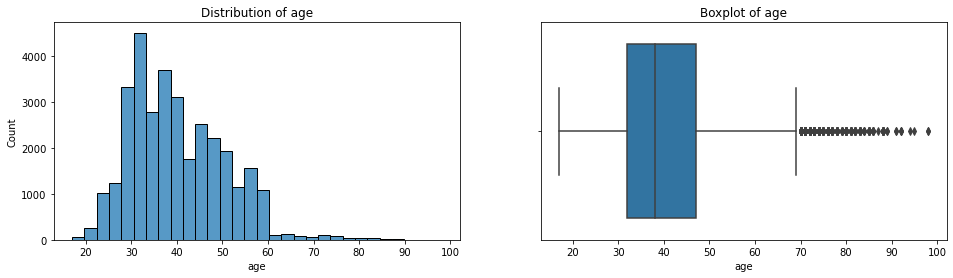

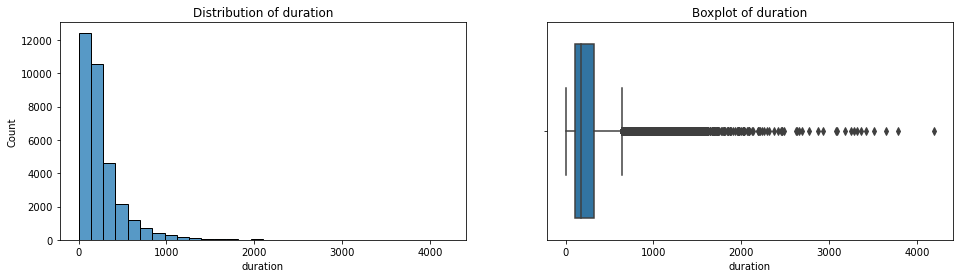

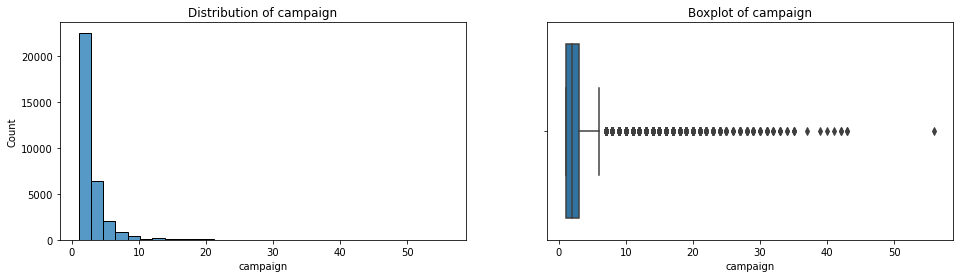

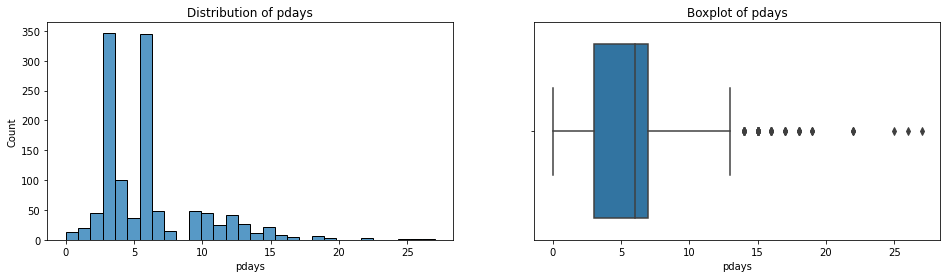

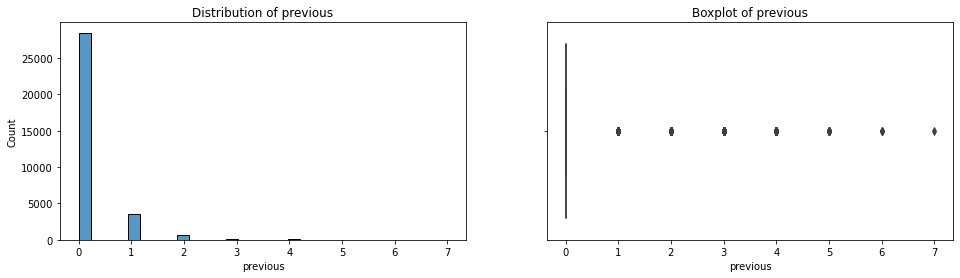

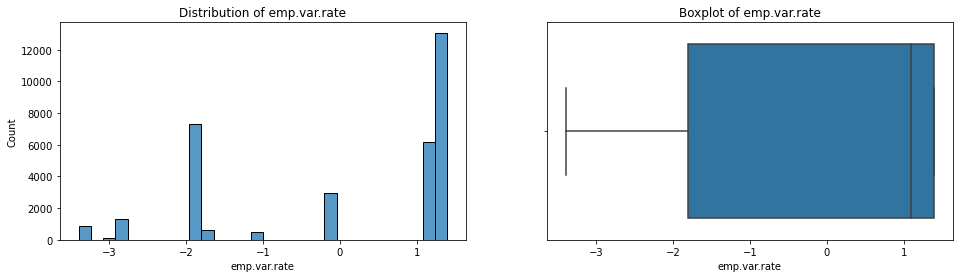

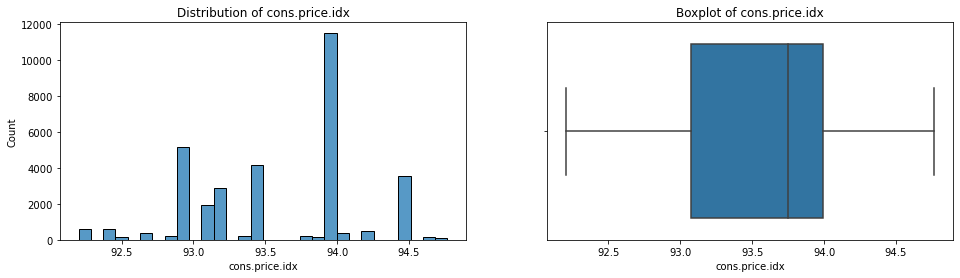

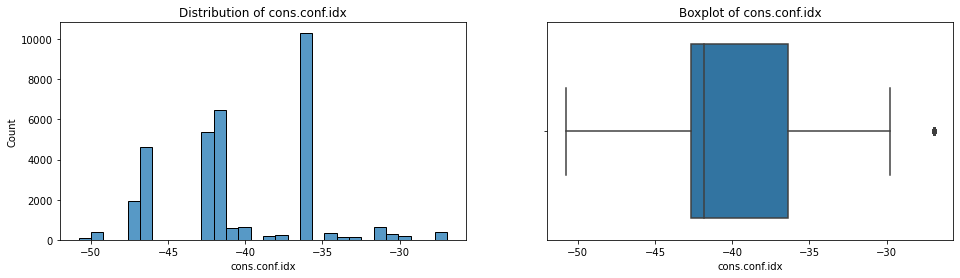

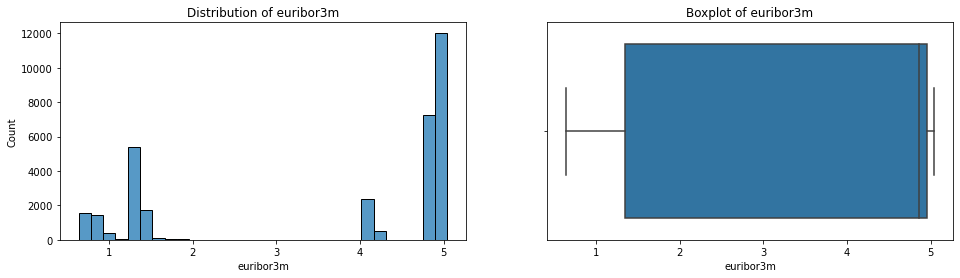

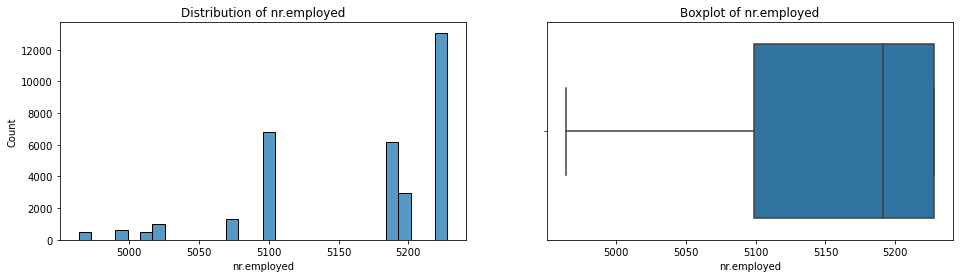

In [55]:
for column in num_columns:
    diagnostic_plots (X_train, column)

Membuat fungsi cek jumlah outlier

In [56]:
def check_outliers(X_train, column):
    skewness = X_train[column].skew(axis=0, skipna=True)
    if skewness <= 0.5 and skewness >=-0.5:
       
        upper_boundary = X_train[column].mean() + 3 * X_train[column].std()
        lower_boundary = X_train[column].mean() - 3 * X_train[column].std()
        print(['Normal'])
        print(f'Upper Boundary of {column}:', upper_boundary)
        print(f'Lower Boundary of {column}:', lower_boundary)
        jumlah_outlier_upper = format(len(X_train[X_train[column] > upper_boundary]))
        print(f'Total Data Above Upper Boundary {column}:', jumlah_outlier_upper)
        jumlah_outlier_lower  = format(len(X_train[X_train[column]<lower_boundary]))
        print(f'Total Data Below Lower Boundary {column}:', jumlah_outlier_lower)
        persentase_outlier_upper = format(len(X_train[X_train[column] > upper_boundary])  / len(X_train)*100)
        print(f'% Data Above Upper Boundary {column}:', persentase_outlier_upper)
        persentase_outlier_lower = format(len(X_train[X_train[column] < lower_boundary])  / len(X_train)*100)
        print(f'% Data Below Lower Boundary {column}:', persentase_outlier_lower)
        print('-'*100)
    else:
         IQR = X_train[column].quantile(0.75) - X_train[column].quantile(0.25)
         lower_boundary = X_train[column].quantile(0.25) - (IQR * 1.5)
         upper_boundary = X_train[column].quantile(0.75) + (IQR * 1.5)
         print(['Skewed'])
         print(f'Upper Boundary of {column}:', upper_boundary)
         print(f'Lower Boundary of {column}:', lower_boundary)
         jumlah_outlier_upper = format(len(X_train[X_train[column] > upper_boundary]))
         print(f'Total Data Above Upper Boundary {column}:', jumlah_outlier_upper)
         jumlah_outlier_lower  = format(len(X_train[X_train[column]<lower_boundary]))
         print(f'Total Data Below Lower Boundary {column}:', jumlah_outlier_lower)
         persentase_outlier_upper = format(len(X_train[X_train[column] > upper_boundary])  / len(X_train)*100)
         print(f'% Data Above Upper Boundary {column}:', persentase_outlier_upper)
         persentase_outlier_lower = format(len(X_train[X_train[column] < lower_boundary])  / len(X_train)*100)
         print(f'% Data Below Lower Boundary {column}:', persentase_outlier_lower)
         print('-'*100)

Masukan fitur yang mau di cek outlier

In [57]:
outlier_feature = ['age','duration','campaign','pdays', 'previous', 'emp.var.rate', 'cons.price.idx',  'cons.conf.idx', 'euribor3m', 'nr.employed']

Memunculkan Jumlah outlier

In [58]:
for feature in outlier_feature:
    check_outliers(X_train,feature)

['Skewed']
Upper Boundary of age: 69.5
Lower Boundary of age: 9.5
Total Data Above Upper Boundary age: 380
Total Data Below Lower Boundary age: 0
% Data Above Upper Boundary age: 1.1535425900066782
% Data Below Lower Boundary age: 0.0
----------------------------------------------------------------------------------------------------
['Skewed']
Upper Boundary of duration: 643.0
Lower Boundary of duration: -221.0
Total Data Above Upper Boundary duration: 2338
Total Data Below Lower Boundary duration: 0
% Data Above Upper Boundary duration: 7.097322566935826
% Data Below Lower Boundary duration: 0.0
----------------------------------------------------------------------------------------------------
['Skewed']
Upper Boundary of campaign: 6.0
Lower Boundary of campaign: -2.0
Total Data Above Upper Boundary campaign: 1936
Total Data Below Lower Boundary campaign: 0
% Data Above Upper Boundary campaign: 5.876995932244551
% Data Below Lower Boundary campaign: 0.0
-----------------------------

Handle outlier kolom 'age' dan 'pdays' menggunakan trimming dikarenakan dibawah 5%

In [59]:
print('X_train - Before Handling :', X_train.shape)
outlier_trimmer1 = OutlierTrimmer(capping_method='iqr',
                   tail='both',
                   fold=1.5,
                   variables=['age', 'pdays'],
                   missing_values='ignore'
                   )

outlier_trimmer1.fit(X_train)

X_train = outlier_trimmer1.transform(X_train)
print('X_train - After Handling : ', X_train.shape)

X_train - Before Handling : (32942, 20)
X_train - After Handling :  (32505, 20)


In [60]:
X_train.shape

(32505, 20)

Handle Outlier kolom campaign dikarenakan diatas 5% menggunakan capping winsorizer, dan saya memutuskan untuk tidak handle outlier kolom previous dikarenakan setelah beberapa kali uji coba saya mendapatkan hasilnya menjadi 0 semua dan menjadikanya terbaca sebagai NaN alias Missing Value

In [61]:
print('X_train - Before Handling :', X_train.shape)
windsorizer = Winsorizer(capping_method='iqr',
                   tail='both',
                   fold=1.5,
                   variables=['campaign'],
                   missing_values='ignore'
                   )

windsorizer.fit(X_train)

X_train = windsorizer.transform(X_train)
print('X_train - After Handling : ', X_train.shape)

X_train - Before Handling : (32505, 20)
X_train - After Handling :  (32505, 20)


Menyamakan row y_train dengan X_train yang sudah di trimming outlier

In [62]:
y_train = y_train[X_train.index]

## Handle Missing Value

Terdapat ada missing value di kolom pdays

In [63]:
X_train.isnull().sum()

age                   0
job                   0
marital               0
education             0
default               0
housing               0
loan                  0
contact               0
month                 0
day_of_week           0
duration              0
campaign              0
pdays             31432
previous              0
poutcome              0
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed           0
dtype: int64

In [64]:
X_test.isnull().sum()

age                  0
job                  0
marital              0
education            0
default              0
housing              0
loan                 0
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays             7936
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
dtype: int64

Membuat fungsi input Missing Value menggunakan Median

In [65]:
def input_na_median(data, column):
    median_value = X_train[column].median()

    fillna_median = data[column].fillna(median_value, inplace =True)

    return fillna_median

Inpute pdays menggunakan median dikarenakan data tersebut berdistribusi skewed

In [66]:
inpute_median_feature = ['pdays']

Input pdays di X_train

In [67]:
for column in inpute_median_feature:
    input_na_median(X_train,column)

Input pdays di X_test

In [68]:
for column in inpute_median_feature:
    input_na_median(X_test,column)

Sekarang missing value di X_train sudah 0

In [69]:
X_train.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

Missing Value di X_test sudah 0

In [70]:
X_test.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

## Fitur Selection

Fitur Selection menggunakan pearson untuk fitur numerik

In [71]:
X_train.corr(method='pearson')

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.002385,0.011460,-0.005148,-0.020062,0.066393,0.034744,0.106798,0.079534,0.063019
duration,-0.002385,1.000000,-0.053422,0.014459,0.019045,-0.025436,0.005005,-0.010936,-0.029945,-0.041612
campaign,0.011460,-0.053422,1.000000,0.021584,-0.084903,0.151096,0.120268,-0.016064,0.130950,0.144569
pdays,-0.005148,0.014459,0.021584,1.000000,-0.128052,0.058913,0.039167,-0.036501,0.048483,0.058076
previous,-0.020062,0.019045,-0.084903,-0.128052,1.000000,-0.420602,-0.215467,-0.064150,-0.451675,-0.495341
emp.var.rate,0.066393,-0.025436,0.151096,0.058913,-0.420602,1.000000,0.779078,0.228192,0.973038,0.910324
cons.price.idx,0.034744,0.005005,0.120268,0.039167,-0.215467,0.779078,1.000000,0.082068,0.697178,0.537319
cons.conf.idx,0.106798,-0.010936,-0.016064,-0.036501,-0.064150,0.228192,0.082068,1.000000,0.307643,0.129239
euribor3m,0.079534,-0.029945,0.130950,0.048483,-0.451675,0.973038,0.697178,0.307643,1.000000,0.945777
nr.employed,0.063019,-0.041612,0.144569,0.058076,-0.495341,0.910324,0.537319,0.129239,0.945777,1.000000


melihat korelasi y dengan fitur numerik lainya

In [72]:
c = data.corr(method = "pearson")
c_sorted = c.sort_values( by=['y'], ascending = False )
c_sorted["y"]

y                 1.000000
duration          0.405274
previous          0.230181
cons.conf.idx     0.054878
age               0.030399
pdays            -0.035223
campaign         -0.066357
cons.price.idx   -0.136211
emp.var.rate     -0.298334
euribor3m        -0.307771
nr.employed      -0.354678
Name: y, dtype: float64

Hitmap correlation

<AxesSubplot:>

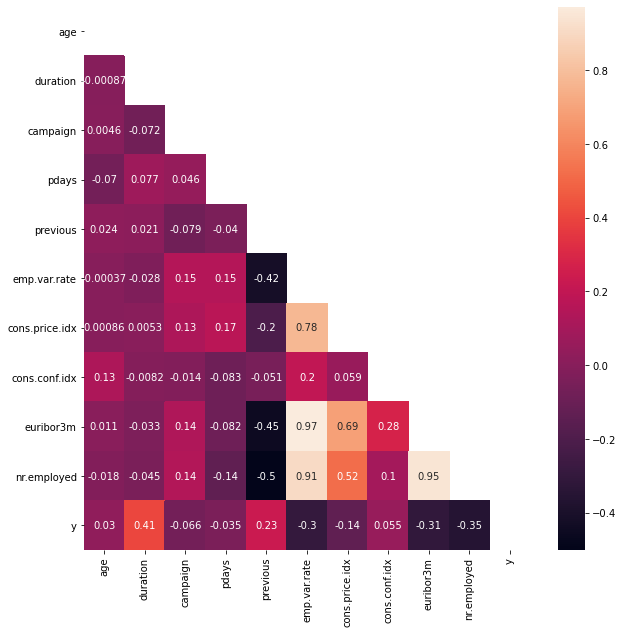

In [73]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True, mask=np.triu(data.corr()))

Drop Kolom yang memiliki korelasi kecil
1. Kolom numerik di drop berdasarkan pearson korelasi dengan data y
- 0 : Tidak ada korelasi
- 0.00 - 0.25 : korelasi sangat lemah
- 0.25 - 0.50 : korelasi cukup
- 0.50 - 0.75 : korleasi kuat
- 0.75 - 0.99 : korelasi sangat kuat
- 1 : korelasi sempurna
- Sumber : http://www.statistikolahdata.com/2010/11/korelasi-pearson.html#:~:text=0%20%3A%20Tidak%20ada%20korelasi,0.50%20%2D%200.75%20%3A%20korleasi%20kuat
2. kolom categorical di drop berasarkan explore data analisis

In [74]:
X_train.drop('pdays', axis=1, inplace=True)
X_test.drop('pdays', axis=1, inplace=True)
X_train.drop('campaign', axis=1, inplace=True)
X_test.drop('campaign', axis=1, inplace=True)
X_train.drop('cons.price.idx', axis=1, inplace=True)
X_test.drop('cons.price.idx', axis=1, inplace=True)
X_train.drop('cons.conf.idx', axis=1, inplace=True)
X_test.drop('cons.conf.idx', axis=1, inplace=True)
X_train.drop('education', axis=1, inplace=True)
X_test.drop('education', axis=1, inplace=True)
X_train.drop('job', axis=1, inplace=True)
X_test.drop('job', axis=1, inplace=True)
X_train.drop('month', axis=1, inplace=True)
X_test.drop('month', axis=1, inplace=True)
X_train.drop('loan', axis=1, inplace=True)
X_test.drop('loan', axis=1, inplace=True)
X_train.drop('contact', axis=1, inplace=True)
X_test.drop('contact', axis=1, inplace=True)
X_train.drop('duration', axis=1, inplace=True)
X_test.drop('duration', axis=1, inplace=True)

Fitur X_train terbaru

In [75]:
X_train

,age,marital,default,housing,day_of_week,previous,poutcome,emp.var.rate,euribor3m,nr.employed
8111,41,married,no,unknown,mon,0,nonexistent,1.4,4.865,5228.1
14684,56,divorced,no,no,tue,0,nonexistent,1.4,4.961,5228.1
8495,30,divorced,no,no,wed,0,nonexistent,1.4,4.864,5228.1
33255,27,single,no,yes,tue,0,nonexistent,-1.8,1.291,5099.1
3031,37,married,unknown,no,wed,0,nonexistent,1.1,4.859,5191.0
...,...,...,...,...,...,...,...,...,...,...
6175,32,married,no,no,tue,0,nonexistent,1.1,4.857,5191.0
9704,42,divorced,no,no,mon,0,nonexistent,1.4,4.961,5228.1
11190,45,married,no,no,thu,0,nonexistent,1.4,4.961,5228.1
26569,33,divorced,no,yes,thu,1,failure,-0.1,4.076,5195.8


Fitur X_test terbaru

In [76]:
X_test

,age,marital,default,housing,day_of_week,previous,poutcome,emp.var.rate,euribor3m,nr.employed
23771,31,married,no,yes,thu,0,nonexistent,1.4,4.962,5228.1
15077,34,married,no,yes,thu,0,nonexistent,1.4,4.958,5228.1
10418,47,married,unknown,no,mon,0,nonexistent,1.4,4.960,5228.1
24127,42,married,no,yes,mon,0,nonexistent,-0.1,4.191,5195.8
22299,48,married,no,no,thu,0,nonexistent,1.4,4.963,5228.1
...,...,...,...,...,...,...,...,...,...,...
24957,38,married,no,yes,tue,0,nonexistent,-0.1,4.153,5195.8
10892,54,single,unknown,no,wed,0,nonexistent,1.4,4.962,5228.1
16464,44,married,no,no,wed,0,nonexistent,1.4,4.963,5228.1
15635,30,single,no,yes,mon,0,nonexistent,1.4,4.960,5228.1


## Split antara fitur numerik dan kategorical

In [77]:
num_columns_tra = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

num_columns = X_test.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_test.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns: ', num_columns)
print('Categorical Columns: ', cat_columns)

Numerical Columns:  ['age', 'previous', 'emp.var.rate', 'euribor3m', 'nr.employed']
Categorical Columns:  ['marital', 'default', 'housing', 'day_of_week', 'poutcome']


In [78]:
X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

Fitur numerik

In [79]:
X_train_num

,age,previous,emp.var.rate,euribor3m,nr.employed
8111,41,0,1.4,4.865,5228.1
14684,56,0,1.4,4.961,5228.1
8495,30,0,1.4,4.864,5228.1
33255,27,0,-1.8,1.291,5099.1
3031,37,0,1.1,4.859,5191.0
...,...,...,...,...,...
6175,32,0,1.1,4.857,5191.0
9704,42,0,1.4,4.961,5228.1
11190,45,0,1.4,4.961,5228.1
26569,33,1,-0.1,4.076,5195.8


Fitur categorical

In [80]:
X_train_cat

,marital,default,housing,day_of_week,poutcome
8111,married,no,unknown,mon,nonexistent
14684,divorced,no,no,tue,nonexistent
8495,divorced,no,no,wed,nonexistent
33255,single,no,yes,tue,nonexistent
3031,married,unknown,no,wed,nonexistent
...,...,...,...,...,...
6175,married,no,no,tue,nonexistent
9704,divorced,no,no,mon,nonexistent
11190,married,no,no,thu,nonexistent
26569,divorced,no,yes,thu,failure


## Fitur Scaling

Untuk scaling menggunakan Min Max Scaler

In [81]:
scaler = MinMaxScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

X_train_num_scaled

array([[0.46153846, 0.        , 1.        , 0.95919293, 1.        ],
       [0.75      , 0.        , 1.        , 0.9809567 , 1.        ],
       [0.25      , 0.        , 1.        , 0.95896622, 1.        ],
       ...,
       [0.53846154, 0.        , 1.        , 0.9809567 , 1.        ],
       [0.30769231, 0.14285714, 0.6875    , 0.78032192, 0.8778828 ],
       [0.55769231, 0.        , 1.        , 0.98231693, 1.        ]])

Untuk Encoder menggunakan One Hot Encoder dikarenakan data categoricalnya bertipe nominal

In [82]:
encoder = OneHotEncoder()
encoder.fit(X_train_cat)
X_train_cat_enc = encoder.transform(X_train_cat).toarray()
OHE_model = OneHotEncoder(handle_unknown = 'ignore')
X_test_cat_enc = encoder.transform(X_test_cat).toarray()
OHE_model = OneHotEncoder(handle_unknown = 'ignore')
X_train_cat_enc

array([[0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

## Menggabungkan data numerik dan categorical

In [83]:
X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_enc], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_enc], axis=1)
X_train_final

array([[0.46153846, 0.        , 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.75      , 0.        , 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.25      , 0.        , 1.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.53846154, 0.        , 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.30769231, 0.14285714, 0.6875    , ..., 1.        , 0.        ,
        0.        ],
       [0.55769231, 0.        , 1.        , ..., 0.        , 1.        ,
        0.        ]])

# 6. Model Definition

Model Definition Logistic Regression

In [84]:
lr = LogisticRegression()

Model Definition SVM Classifier

In [85]:
clf = SVC()

Model Definition Decision Tree

In [86]:
dt = DecisionTreeClassifier()

Model Definition Random Forest

In [87]:
rf = RandomForestClassifier()

Model Definition k-NN

In [88]:
knn = KNeighborsClassifier()

Model Definition Naive bayes

In [89]:
nb = GaussianNB()

Model Definition SGD Classifier

In [90]:
sgd = SGDClassifier()

# 7. Model Training

### Melakukan model training dengan baseline model

Model Training Logistic Regression

In [91]:
lr.fit(X_train_final, y_train)

LogisticRegression()

Model Training SVM Classifier

In [92]:
clf.fit(X_train_final, y_train)

SVC()

Model Training Decision Tree

In [93]:
dt.fit(X_train_final, y_train)

DecisionTreeClassifier()

Model Training Random Forest Classifier

In [94]:
rf.fit(X_train_final, y_train)

RandomForestClassifier()

Model Training k-NN

In [95]:
knn.fit(X_train_final, y_train)

KNeighborsClassifier()

Model Definition Naive Bayes

In [96]:
nb.fit(X_train_final, y_train)

GaussianNB()

Model Definition SGD Classifier

In [97]:
sgd.fit(X_train_final, y_train)

SGDClassifier()

# 8. Model Evaluation

Model Evaluation Logistic Regression

Logistic Regression
Accuracy - Train Set Logistic  :  0.9029072450392247 

Classification Report : 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95     29033
           1       0.70      0.16      0.26      3472

    accuracy                           0.90     32505
   macro avg       0.81      0.57      0.60     32505
weighted avg       0.89      0.90      0.87     32505
 

Confusion Matrix      : 


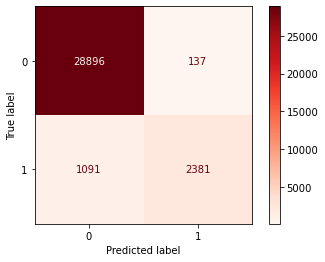

In [98]:
y_pred_train = lr.predict(X_train_final)

print('Logistic Regression')
print('Accuracy - Train Set Logistic  : ', accuracy_score(y_train, y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf, X_train_final, y_train, cmap='Reds'))


Model Evaluation SVM Classifier

SVM Classifier
Accuracy - Train Set Logistic  :  0.9022611905860637 

Classification Report : 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95     29033
           1       0.66      0.17      0.27      3472

    accuracy                           0.90     32505
   macro avg       0.79      0.58      0.61     32505
weighted avg       0.88      0.90      0.88     32505
 

Confusion Matrix      : 


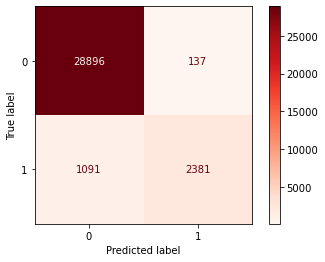

In [99]:
y_pred_train = clf.predict(X_train_final)

print('SVM Classifier')
print('Accuracy - Train Set Logistic  : ', accuracy_score(y_train, y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf, X_train_final, y_train, cmap='Reds'))


Model Evaluation Decision Tree

Decision Tree
Accuracy - Train Set Logistic  :  0.9622519612367328 

Classification Report : 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     29033
           1       0.98      0.66      0.79      3472

    accuracy                           0.96     32505
   macro avg       0.97      0.83      0.88     32505
weighted avg       0.96      0.96      0.96     32505
 

Confusion Matrix      : 


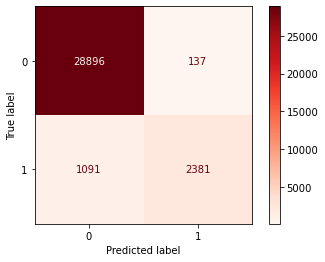

In [100]:
y_pred_train = dt.predict(X_train_final)

print('Decision Tree')
print('Accuracy - Train Set Logistic  : ', accuracy_score(y_train, y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf, X_train_final, y_train, cmap='Reds'))

Model Evaluation Random Forest

Random Forest
Accuracy - Train Set  :  0.9622211967389632 

Classification Report : 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     29033
           1       0.95      0.69      0.79      3472

    accuracy                           0.96     32505
   macro avg       0.95      0.84      0.89     32505
weighted avg       0.96      0.96      0.96     32505
 

Confusion Matrix      : 


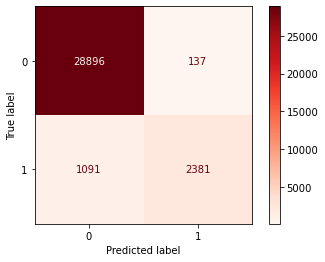

In [101]:
y_pred_train = rf.predict(X_train_final)

print('Random Forest')
print('Accuracy - Train Set  : ', accuracy_score(y_train, y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf, X_train_final, y_train, cmap='Reds'))

Model Evaluation k-NN

K-Nearest Neighbor
Accuracy - Train Set  :  0.9144746962005845 

Classification Report : 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     29033
           1       0.72      0.33      0.45      3472

    accuracy                           0.91     32505
   macro avg       0.82      0.66      0.70     32505
weighted avg       0.90      0.91      0.90     32505
 

Confusion Matrix      : 


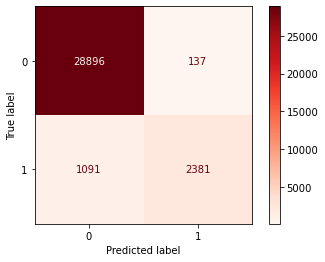

In [102]:
y_pred_train = knn.predict(X_train_final)

print('K-Nearest Neighbor')
print('Accuracy - Train Set  : ', accuracy_score(y_train, y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf, X_train_final, y_train, cmap='Reds'))


Model Evaluation Naive Bayes

Naive Bayes
Accuracy - Train Set  :  0.6538994000922935 

Classification Report : 
               precision    recall  f1-score   support

           0       0.95      0.65      0.77     29033
           1       0.20      0.73      0.31      3472

    accuracy                           0.65     32505
   macro avg       0.57      0.69      0.54     32505
weighted avg       0.87      0.65      0.72     32505
 

Confusion Matrix      : 


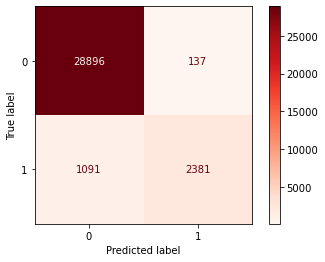

In [103]:
y_pred_train = nb.predict(X_train_final)

print('Naive Bayes')
print('Accuracy - Train Set  : ', accuracy_score(y_train, y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf, X_train_final, y_train, cmap='Reds'))

Model Evaluation SGD Classifier

SGD Classifier
Accuracy - Train Set  :  0.9011229041685894 

Classification Report : 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95     29033
           1       0.63      0.18      0.28      3472

    accuracy                           0.90     32505
   macro avg       0.77      0.58      0.61     32505
weighted avg       0.88      0.90      0.88     32505
 

Confusion Matrix      : 


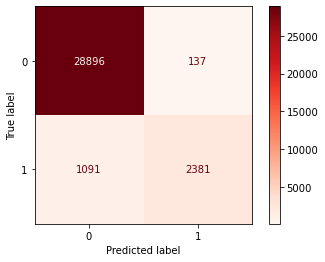

In [104]:
y_pred_train = sgd.predict(X_train_final)

print('SGD Classifier')
print('Accuracy - Train Set  : ', accuracy_score(y_train, y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf, X_train_final, y_train, cmap='Reds'))


## Cross Validation

Cross Validation Logistic Regression

In [105]:
acc_train_cross_val = cross_val_score(lr, 
                                      X_train_final, 
                                      y_train, 
                                      cv=5, scoring="accuracy")

print('Accuracy - All - Cross Validation  : ', acc_train_cross_val)
print('Accuracy - Mean - Cross Validation : ', acc_train_cross_val.mean())
print('Accuracy - Std - Cross Validation  : ', acc_train_cross_val.std())
print('Accuracy - Range of Test-Set       : ', (acc_train_cross_val.mean()-acc_train_cross_val.std()) , '-', (acc_train_cross_val.mean()+acc_train_cross_val.std()))

Accuracy - All - Cross Validation  :  [0.90232272 0.90463006 0.90524535 0.90063067 0.90093832]
Accuracy - Mean - Cross Validation :  0.9027534225503768
Accuracy - Std - Cross Validation  :  0.001882425293435259
Accuracy - Range of Test-Set       :  0.9008709972569415 - 0.9046358478438121


Cross Validation SVM

In [106]:
from sklearn.model_selection import cross_val_score

acc_train_cross_val = cross_val_score(clf, 
                                      X_train_final, 
                                      y_train, 
                                      cv=5, scoring="accuracy")

print('Accuracy - All - Cross Validation  : ', acc_train_cross_val)
print('Accuracy - Mean - Cross Validation : ', acc_train_cross_val.mean())
print('Accuracy - Std - Cross Validation  : ', acc_train_cross_val.std())
print('Accuracy - Range of Test-Set       : ', (acc_train_cross_val.mean()-acc_train_cross_val.std()) , '-', (acc_train_cross_val.mean()+acc_train_cross_val.std()))

Accuracy - All - Cross Validation  :  [0.9021689  0.9035533  0.90401477 0.89986156 0.89970774]
Accuracy - Mean - Cross Validation :  0.9018612521150592
Accuracy - Std - Cross Validation  :  0.0018017597864139515
Accuracy - Range of Test-Set       :  0.9000594923286452 - 0.9036630119014731


Cross Validation Decision Tree

In [107]:
from sklearn.model_selection import cross_val_score

acc_train_cross_val = cross_val_score(dt, 
                                      X_train_final, 
                                      y_train, 
                                      cv=5, scoring="accuracy")

print('Accuracy - All - Cross Validation  : ', acc_train_cross_val)
print('Accuracy - Mean - Cross Validation : ', acc_train_cross_val.mean())
print('Accuracy - Std - Cross Validation  : ', acc_train_cross_val.std())
print('Accuracy - Range of Test-Set       : ', (acc_train_cross_val.mean()-acc_train_cross_val.std()) , '-', (acc_train_cross_val.mean()+acc_train_cross_val.std()))

Accuracy - All - Cross Validation  :  [0.86694355 0.87201969 0.86509768 0.86955853 0.86309798]
Accuracy - Mean - Cross Validation :  0.8673434856175973
Accuracy - Std - Cross Validation  :  0.0031623150344276445
Accuracy - Range of Test-Set       :  0.8641811705831697 - 0.870505800652025


Cross Validation Random Forest

In [108]:
from sklearn.model_selection import cross_val_score

acc_train_cross_val = cross_val_score(rf, 
                                      X_train_final, 
                                      y_train, 
                                      cv=5, scoring="accuracy")

print('Accuracy - All - Cross Validation  : ', acc_train_cross_val)
print('Accuracy - Mean - Cross Validation : ', acc_train_cross_val.mean())
print('Accuracy - Std - Cross Validation  : ', acc_train_cross_val.std())
print('Accuracy - Range of Test-Set       : ', (acc_train_cross_val.mean()-acc_train_cross_val.std()) , '-', (acc_train_cross_val.mean()+acc_train_cross_val.std()))

Accuracy - All - Cross Validation  :  [0.87724965 0.88601754 0.88586371 0.88478696 0.8789417 ]
Accuracy - Mean - Cross Validation :  0.8825719120135365
Accuracy - Std - Cross Validation  :  0.0037180521569693146
Accuracy - Range of Test-Set       :  0.8788538598565672 - 0.8862899641705058


Cross Validation k-NN

In [109]:
from sklearn.model_selection import cross_val_score

acc_train_cross_val = cross_val_score(knn, 
                                      X_train_final, 
                                      y_train, 
                                      cv=5, scoring="accuracy")

print('Accuracy - All - Cross Validation  : ', acc_train_cross_val)
print('Accuracy - Mean - Cross Validation : ', acc_train_cross_val.mean())
print('Accuracy - Std - Cross Validation  : ', acc_train_cross_val.std())
print('Accuracy - Range of Test-Set       : ', (acc_train_cross_val.mean()-acc_train_cross_val.std()) , '-', (acc_train_cross_val.mean()+acc_train_cross_val.std()))

Accuracy - All - Cross Validation  :  [0.8946316  0.89524689 0.89893862 0.8912475  0.89217044]
Accuracy - Mean - Cross Validation :  0.8944470081525919
Accuracy - Std - Cross Validation  :  0.002693255637992854
Accuracy - Range of Test-Set       :  0.8917537525145991 - 0.8971402637905848


Cross Validation Naive Bayes

In [110]:
from sklearn.model_selection import cross_val_score

acc_train_cross_val = cross_val_score(nb, 
                                      X_train_final, 
                                      y_train, 
                                      cv=5, scoring="accuracy")

print('Accuracy - All - Cross Validation  : ', acc_train_cross_val)
print('Accuracy - Mean - Cross Validation : ', acc_train_cross_val.mean())
print('Accuracy - Std - Cross Validation  : ', acc_train_cross_val.std())
print('Accuracy - Range of Test-Set       : ', (acc_train_cross_val.mean()-acc_train_cross_val.std()) , '-', (acc_train_cross_val.mean()+acc_train_cross_val.std()))

Accuracy - All - Cross Validation  :  [0.66220581 0.65789878 0.62282726 0.82541148 0.61482849]
Accuracy - Mean - Cross Validation :  0.6766343639440086
Accuracy - Std - Cross Validation  :  0.07669290034578112
Accuracy - Range of Test-Set       :  0.5999414635982274 - 0.7533272642897897


Cross Validation SGD Classifier

In [111]:
from sklearn.model_selection import cross_val_score

acc_train_cross_val = cross_val_score(sgd, 
                                      X_train_final, 
                                      y_train, 
                                      cv=5, scoring="accuracy")

print('Accuracy - All - Cross Validation  : ', acc_train_cross_val)
print('Accuracy - Mean - Cross Validation : ', acc_train_cross_val.mean())
print('Accuracy - Std - Cross Validation  : ', acc_train_cross_val.std())
print('Accuracy - Range of Test-Set       : ', (acc_train_cross_val.mean()-acc_train_cross_val.std()) , '-', (acc_train_cross_val.mean()+acc_train_cross_val.std()))

Accuracy - All - Cross Validation  :  [0.90047685 0.90293801 0.90386094 0.89955391 0.8987848 ]
Accuracy - Mean - Cross Validation :  0.9011229041685894
Accuracy - Std - Cross Validation  :  0.0019563898594781724
Accuracy - Range of Test-Set       :  0.8991665143091112 - 0.9030792940280676


Dari hasil pengecekan Cross Validation diatas didapatkan nilai tertinggi pada model Logistic Regression dengan nilai akurasi mean cross validation sebesar 0.9027534225503768 dan range tertinggi 0.9046358478438121 lebih besar sedikit dibandingkan dengan SGD Classifier dengan mean cross validation sebesar 0.9011229041685894 dan range tertinggi 0.9030792940280676, maka untuk proses hyperparamater tunning akan menggunakan model Logistic Regression

selanjutnya dilakukan pengecekan performa Model Logistic Regression Test Set dan di dapatkan nilai akurasi sebesar 90% dan f1 score 87%

Accuracy - Test Set   :  0.8987372510927635 

Classification Report : 
               precision    recall  f1-score   support

           0       0.90      0.99      0.95      7289
           1       0.77      0.17      0.28       947

    accuracy                           0.90      8236
   macro avg       0.83      0.58      0.61      8236
weighted avg       0.89      0.90      0.87      8236
 

Confusion Matrix      : 


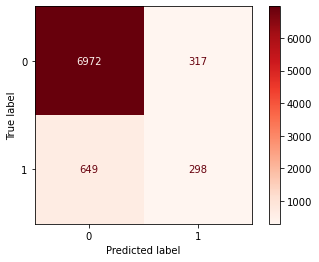

In [112]:
# Check Performance Model against Test-Set

y_pred_test = lr.predict(X_test_final)

print('Accuracy - Test Set   : ', accuracy_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf, X_test_final, y_test, cmap='Reds'))

Nilai AUC Logistic Regression sebesar 76%

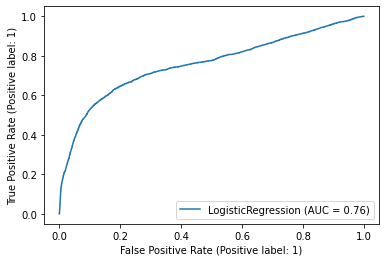

In [113]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(lr, X_train_final, y_train)

## Hyperparamater Tunning

Paramater yang di berikan untuk hyperparamater tunning menggunakan GridsearchCV pada Logistic Regression adalah penalty = ['l1', 'l2', 'elasticnet', 'none'], C = [100, 10, 1.0, 0.1, 0.01], max_iter= [100, 325, 550, 775, 1000], multi_class = ['auto', 'ovr', 'multinomial']

Untuk default paramater Logistic Regression adalah :
- Penalty = l2
- C = 1.0
- Max_iter = 100
- multi_class = auto

In [114]:
penalty = ['l1', 'l2', 'elasticnet', 'none']
C = [100, 10, 1.0, 0.1, 0.01]
multi_class = ['auto', 'ovr', 'multinomial']
max_iter = [int(x) for x in np.linspace(100, 1000, 5)]
random_grid = {'penalty':penalty,
               'C':C,
               'multi_class':multi_class,
               'max_iter':max_iter
               }
random_grid

{'penalty': ['l1', 'l2', 'elasticnet', 'none'],
 'C': [100, 10, 1.0, 0.1, 0.01],
 'multi_class': ['auto', 'ovr', 'multinomial'],
 'max_iter': [100, 325, 550, 775, 1000]}

In [115]:
lr_gridcv = GridSearchCV(estimator=LogisticRegression(),
                         param_grid=random_grid,
                         cv=5,
                         n_jobs=-1,
                         verbose=2)

lr_gridcv.fit(X_train_final, y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'max_iter': [100, 325, 550, 775, 1000],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             verbose=2)

Untuk paramater terbaik hasil gridsearch adalah {'C': 0.01, 'max_iter': 100, 'multi_class': 'multinomial', 'penalty': 'l2'}

In [116]:
lr_gridcv.best_params_

{'C': 0.1, 'max_iter': 100, 'multi_class': 'multinomial', 'penalty': 'l2'}

In [117]:
lr_gridcv_best = lr_gridcv.best_estimator_

Setelah dilakukan hyperparamater tunning didapatkan nilai akurasi sebesar 90% dan F1 score 87%, untuk hyperparamater ini tidak didapatkan peningkatan skor yang berarti nilai akurasi dan f1 score pada baseline sudah cukup baik

Accuracy - Train Set   :  0.9028764805414552 

Classification Report : 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95     29033
           1       0.70      0.16      0.26      3472

    accuracy                           0.90     32505
   macro avg       0.80      0.57      0.60     32505
weighted avg       0.89      0.90      0.87     32505
 

Confusion Matrix      : 
Accuracy - Test Set   :  0.8988586692569208 

Classification Report : 
               precision    recall  f1-score   support

           0       0.90      0.99      0.95      7289
           1       0.77      0.17      0.28       947

    accuracy                           0.90      8236
   macro avg       0.83      0.58      0.61      8236
weighted avg       0.89      0.90      0.87      8236
 

Confusion Matrix      : 


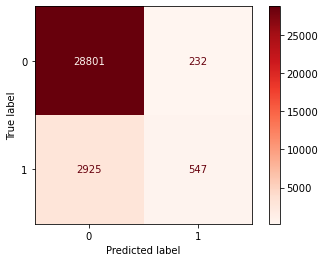

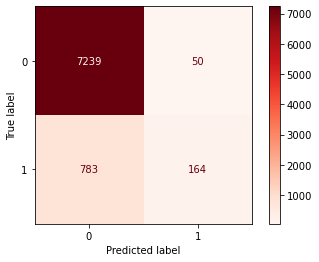

In [136]:
# Check Performance Model against Train-Set
y_pred_train = lr_gridcv_best.predict(X_train_final)

print('Accuracy - Train Set   : ', accuracy_score(y_train, y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(lr_gridcv_best, X_train_final, y_train, cmap='Reds'))

# Check Performance Model against Test-Set
y_pred_test = lr_gridcv_best.predict(X_test_final)

print('Accuracy - Test Set   : ', accuracy_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(lr_gridcv_best, X_test_final, y_test, cmap='Reds'))

Untuk Nilai AUC juga tidak didapatkan peningkatan tetap pada nilai akurasi awal yaitu 76%

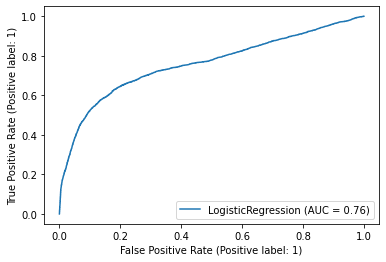

In [119]:
plot_roc_curve(lr_gridcv_best, X_train_final, y_train)

# 9. Model Inferenced

In [120]:
data_inf

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,25,student,single,high.school,no,yes,no,cellular,may,mon,...,3,NaN,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1,0
1,36,management,married,university.degree,no,no,no,cellular,aug,mon,...,2,NaN,0,nonexistent,-2.9,92.201,-31.4,0.884,5076.2,0
2,88,retired,divorced,basic.4y,no,yes,yes,cellular,mar,wed,...,5,NaN,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,1
3,38,blue-collar,married,unknown,no,yes,yes,cellular,jul,wed,...,2,NaN,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,0
4,35,technician,married,university.degree,no,no,no,cellular,apr,mon,...,1,NaN,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
5,35,self-employed,married,high.school,no,no,no,cellular,jul,mon,...,3,NaN,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,0
6,38,student,divorced,unknown,no,no,no,cellular,may,tue,...,3,NaN,0,nonexistent,-1.8,92.893,-46.2,1.291,5099.1,0
7,33,services,single,high.school,no,no,no,telephone,may,mon,...,5,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
8,38,unemployed,divorced,professional.course,no,no,no,telephone,may,wed,...,3,NaN,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,0
9,51,admin.,married,basic.9y,no,no,yes,cellular,nov,tue,...,5,NaN,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,0


Melakukan Drop pada data inference yang disamakan dengan drop pada dataset asli

In [121]:
data_inf.drop('pdays', axis=1, inplace=True)
data_inf.drop('campaign', axis=1, inplace=True)
data_inf.drop('cons.price.idx', axis=1, inplace=True)
data_inf.drop('cons.conf.idx', axis=1, inplace=True)
data_inf.drop('education', axis=1, inplace=True)
data_inf.drop('job', axis=1, inplace=True)
data_inf.drop('month', axis=1, inplace=True)
data_inf.drop('loan', axis=1, inplace=True)
data_inf.drop('contact', axis=1, inplace=True)
data_inf.drop('duration', axis=1, inplace=True)

In [122]:
data_inf

,age,marital,default,housing,day_of_week,previous,poutcome,emp.var.rate,euribor3m,nr.employed,y
0,25,single,no,yes,mon,0,nonexistent,-1.8,1.244,5099.1,0
1,36,married,no,no,mon,0,nonexistent,-2.9,0.884,5076.2,0
2,88,divorced,no,yes,wed,0,nonexistent,-1.8,1.663,5099.1,1
3,38,married,no,yes,wed,0,nonexistent,1.4,4.963,5228.1,0
4,35,married,no,no,mon,0,nonexistent,-1.8,1.405,5099.1,0
5,35,married,no,no,mon,0,nonexistent,1.4,4.960,5228.1,0
6,38,divorced,no,no,tue,0,nonexistent,-1.8,1.291,5099.1,0
7,33,single,no,no,mon,0,nonexistent,1.1,4.857,5191.0,0
8,38,divorced,no,no,wed,0,nonexistent,1.1,4.856,5191.0,0
9,51,married,no,no,tue,0,nonexistent,-0.1,4.153,5195.8,0


Mengelompokan mana yang data numerik dan kategorikal

In [123]:
data_inf_numeric = data_inf[num_columns]
data_inf_categorical = data_inf[cat_columns]

Proses scaling dan encoder data inference

In [124]:
data_inf_num_scaled = scaler.transform(data_inf_numeric)
data_inf_num_enc = encoder.transform(data_inf_categorical).toarray()

Menggabungkan data numeric dan kategorical yang sudah di scaling dan encoder

In [125]:
data_inf_final = np.concatenate([data_inf_num_scaled, data_inf_num_enc], axis=1)
data_inf_final

array([[0.15384615, 0.        , 0.33333333, 0.13829064, 0.51228733,
        0.        , 0.        , 1.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        ],
       [0.36538462, 0.        , 0.10416667, 0.05667649, 0.42570888,
        0.        , 1.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        ],
       [1.36538462, 0.        , 0.33333333, 0.23328044, 0.51228733,
        1.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 1.        , 0.        ],
       [0.40384615, 0.        , 1.        , 0.981

Mendapatkan hasil prediksi data inference 

In [126]:
y_pred_inf = lr_gridcv_best.predict(data_inf_final)
y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['Deposito - Prediction'])
y_pred_inf_df

,Deposito - Prediction
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


Menggabungkan hasil prediksi dan dataframe inference

In [127]:
pd.concat([data_inf, y_pred_inf_df], axis=1)


,age,marital,default,housing,day_of_week,previous,poutcome,emp.var.rate,euribor3m,nr.employed,y,Deposito - Prediction
0,25,single,no,yes,mon,0,nonexistent,-1.8,1.244,5099.1,0,0
1,36,married,no,no,mon,0,nonexistent,-2.9,0.884,5076.2,0,0
2,88,divorced,no,yes,wed,0,nonexistent,-1.8,1.663,5099.1,1,0
3,38,married,no,yes,wed,0,nonexistent,1.4,4.963,5228.1,0,0
4,35,married,no,no,mon,0,nonexistent,-1.8,1.405,5099.1,0,0
5,35,married,no,no,mon,0,nonexistent,1.4,4.960,5228.1,0,0
6,38,divorced,no,no,tue,0,nonexistent,-1.8,1.291,5099.1,0,0
7,33,single,no,no,mon,0,nonexistent,1.1,4.857,5191.0,0,0
8,38,divorced,no,no,wed,0,nonexistent,1.1,4.856,5191.0,0,0
9,51,married,no,no,tue,0,nonexistent,-0.1,4.153,5195.8,0,0


# 10. Pengambilan Kesimpulan

1. Sebagian besar pekerjaan klien kita adalah admin, kedua adalah blue-collar, dan ketiga di isi oleh teknisi.
2. Sebagian besar klien kita sudah menikah dengan jumlah klien 24928 dengan presentasi 60%
3. Kampanye ini kebanyakan dilakukan kontak melalui seluler
4. Hal lain yang dapat dilakukan diantaranya menaikkan intensitas marketing pada bulan-bulan tertentu yang dimana seorang pegawai atau pengusaha mendapatkan gaji dobel, seperti yang saya lihat pada proses EDA pada bulan MEI lebih banyak yg menerima dibandingkan bulan lain
5. Dari kampanye sebelumnya lebih banyak kegagalan di bandingkan denga berhasil
6. Dari hasil baseline model dari 7 model klasifikasi didapatkan nilai cross validation terbesar yaitu model Logistic Regression dengan nilai mean cross validation sebesar 0.9027534225503768 dan range tertinggi 0.9046358478438121
7. Nilai akurasi test set pada Logistic Regression adalah nilai akurasi sebesar 90% dan f1 score 87%
8. Untuk Hyperparamater Tunning menggunakan model Logistic Regression dikarenakan memiliki nilai terbaik dibandingkan model lain
8. Paramater yang di berikan untuk hyperparamater tunning menggunakan GridsearchCV pada Logistic Regression adalah penalty = ['l1', 'l2', 'elasticnet', 'none'], C = [100, 10, 1.0, 0.1, 0.01], max_iter= [100, 325, 550, 775, 1000], multi_class = ['auto', 'ovr', 'multinomial']
10. Untuk paramater terbaik hasil gridsearch adalah {'C': 0.01, 'max_iter': 100, 'multi_class': 'multinomial', 'penalty': 'l2'}
11. Setelah dilakukan hyperparamater tunning didapatkan nilai akurasi sebesar 90% dan F1 score 87%, untuk hyperparamater ini tidak didapatkan peningkatan skor yang berarti nilai akurasi dan f1 score pada baseline sudah cukup baik
12. Untuk nilai akurasi AUC juga tidak terjadi peningkatan tetap pada nilai akurasu 76%
13. Dari ke 7 model yang terbaik untuk proses ini adalah Logistic Regression dengan nilai akurasi dan F1 score terbaik dan berdasarkan hasil train set dan test setnya bisa di katakan goodfit